In [1]:
import numpy as np
import pandas as pd

from pdf import PdfFile
from pathlib import Path
import re

import sys, glob
sys.path.append('../')

import tools, biblio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ravenclaw\example_dataframes.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'date': pd.Series(pd.date_range(start = pd.datetime.today(), periods = 11)).dt.date


# Load

## Load core

In [2]:
df = pd.DataFrame(glob.glob('../biblio/*/files/*/*.pdf'), columns=['path'])
df['path'] = df['path'].apply(lambda x: Path(x))
df['stem'] = df['path'].apply(lambda x: x.stem)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    746 non-null    object
 1   stem    746 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [3]:
df = df.drop_duplicates('stem')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    687 non-null    object
 1   stem    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [4]:
df = biblio.load_biblios(r'../biblio/', ['1_navigation', '3_systemes', '4_r_and_d', 'eco'])
df.info()
df['origin'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  7776 non-null   object
 1   keys    7776 non-null   object
 2   soups   7776 non-null   object
dtypes: object(3)
memory usage: 182.4+ KB


..\biblio\eco\eco.rdf                      6970
..\biblio\4_r_and_d\4_r_and_d.rdf           423
..\biblio\3_systemes\3_systemes.rdf         299
..\biblio\1_navigation\1_navigation.rdf      84
Name: origin, dtype: int64

## Extract title

In [5]:
biblio.extract_title(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  7776 non-null   object
 1   keys    7776 non-null   object
 2   soups   7776 non-null   object
 3   title   7776 non-null   object
dtypes: object(4)
memory usage: 243.1+ KB


origin  \
0     ..\biblio\1_navigation\1_navigation.rdf   
1     ..\biblio\1_navigation\1_navigation.rdf   
2     ..\biblio\1_navigation\1_navigation.rdf   
3     ..\biblio\1_navigation\1_navigation.rdf   
4     ..\biblio\1_navigation\1_navigation.rdf   
...                                       ...   
7771                    ..\biblio\eco\eco.rdf   
7772                    ..\biblio\eco\eco.rdf   
7773                    ..\biblio\eco\eco.rdf   
7774                    ..\biblio\eco\eco.rdf   
7775                    ..\biblio\eco\eco.rdf   

                                                   keys  \
0     [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...   
1     [#item_204, #item_1304, files/1304/Madgwick - ...   
2     [urn:isbn:978-3-319-06772-8%20978-3-319-06773-...   
3     [#item_209, files/209/Multi-sensor data fusion...   
4     [#item_211, files/211/Inria Patent mdeical ins...   
...                                                 ...   
7771  [http://doi.wiley.com/10.1029/2004GB002259, #i...   
7772  [http://doi.wiley.com/10.2136/sssaj2007.0199, ...   
7773  [http://doi.wiley.com/10.1111/j.1365-2389.2009...   
7774  [https://onlinelibrary.wiley.com/doi/abs/10.10...   
7775  [https://onlinelibrary.wiley.com/doi/abs/10.10...   

                                                  soups  \
0     [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
1     [[\n, [journalArticle], \n, [\n, <bib:journal>...   
2     [[\n, [bookSection], \n, [\n, <bib:book>\n<pri...   
3     [[\n, [attachment], \n, [], \n, [Multi-sensor ...   
4     [[\n, [attachment], \n, [], \n, [Inria Patent ...   
...                                                 ...   
7771  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7772  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7773  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7774  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7775  [[\n, [journalArticle], \n, [\n, <bib:journal>...   

                                                  title  
0     The basics of intravascular optical coherence ...  
1     An eﬃcient orientation ﬁlter for inertial and ...  
2     Implementing a Sensor Fusion Algorithm for 3D ...  
3     Multi-sensor data fusion in sensor-based contr...  
4                   Inria Patent medical instrument.pdf  
...                                                 ...  
7771  Seasonal and diurnal variations in topsoil and...  
7772  Respiration in boreal forest soil as determine...  
7773  Methane oxidation kinetics differ in European ...  
7774  Soil uptake of volatile organic compounds: ubi...  
7775  Uncertainty quantification of global net metha...  

[7776 rows x 4 columns]

## Extract abstract

In [6]:
biblio.extract_abstract(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    7776 non-null   object
 1   keys      7776 non-null   object
 2   soups     7776 non-null   object
 3   title     7776 non-null   object
 4   abstract  2972 non-null   object
dtypes: object(5)
memory usage: 303.9+ KB


origin  \
0     ..\biblio\1_navigation\1_navigation.rdf   
1     ..\biblio\1_navigation\1_navigation.rdf   
2     ..\biblio\1_navigation\1_navigation.rdf   
3     ..\biblio\1_navigation\1_navigation.rdf   
4     ..\biblio\1_navigation\1_navigation.rdf   
...                                       ...   
7771                    ..\biblio\eco\eco.rdf   
7772                    ..\biblio\eco\eco.rdf   
7773                    ..\biblio\eco\eco.rdf   
7774                    ..\biblio\eco\eco.rdf   
7775                    ..\biblio\eco\eco.rdf   

                                                   keys  \
0     [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...   
1     [#item_204, #item_1304, files/1304/Madgwick - ...   
2     [urn:isbn:978-3-319-06772-8%20978-3-319-06773-...   
3     [#item_209, files/209/Multi-sensor data fusion...   
4     [#item_211, files/211/Inria Patent mdeical ins...   
...                                                 ...   
7771  [http://doi.wiley.com/10.1029/2004GB002259, #i...   
7772  [http://doi.wiley.com/10.2136/sssaj2007.0199, ...   
7773  [http://doi.wiley.com/10.1111/j.1365-2389.2009...   
7774  [https://onlinelibrary.wiley.com/doi/abs/10.10...   
7775  [https://onlinelibrary.wiley.com/doi/abs/10.10...   

                                                  soups  \
0     [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
1     [[\n, [journalArticle], \n, [\n, <bib:journal>...   
2     [[\n, [bookSection], \n, [\n, <bib:book>\n<pri...   
3     [[\n, [attachment], \n, [], \n, [Multi-sensor ...   
4     [[\n, [attachment], \n, [], \n, [Inria Patent ...   
...                                                 ...   
7771  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7772  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7773  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7774  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7775  [[\n, [journalArticle], \n, [\n, <bib:journal>...   

                                                  title  \
0     The basics of intravascular optical coherence ...   
1     An eﬃcient orientation ﬁlter for inertial and ...   
2     Implementing a Sensor Fusion Algorithm for 3D ...   
3     Multi-sensor data fusion in sensor-based contr...   
4                   Inria Patent medical instrument.pdf   
...                                                 ...   
7771  Seasonal and diurnal variations in topsoil and...   
7772  Respiration in boreal forest soil as determine...   
7773  Methane oxidation kinetics differ in European ...   
7774  Soil uptake of volatile organic compounds: ubi...   
7775  Uncertainty quantification of global net metha...   

                                               abstract  
0     Optical coherence tomography (OCT) has opened ...  
1     This report presents a novel orientation ﬁlter...  
2     In this paper a sensor fusion algorithm is dev...  
3                                                  None  
4                                                  None  
...                                                 ...  
7771                                               None  
7772                                               None  
7773                                               None  
7774                                               None  
7775                                               None  

[7776 rows x 5 columns]

## Extract file path

In [7]:
biblio.extract_file_path(df)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    7776 non-null   object
 1   keys      7776 non-null   object
 2   soups     7776 non-null   object
 3   title     7776 non-null   object
 4   abstract  2972 non-null   object
 5   path      844 non-null    object
dtypes: object(6)
memory usage: 364.6+ KB


origin  \
0     ..\biblio\1_navigation\1_navigation.rdf   
1     ..\biblio\1_navigation\1_navigation.rdf   
2     ..\biblio\1_navigation\1_navigation.rdf   
3     ..\biblio\1_navigation\1_navigation.rdf   
4     ..\biblio\1_navigation\1_navigation.rdf   
...                                       ...   
7771                    ..\biblio\eco\eco.rdf   
7772                    ..\biblio\eco\eco.rdf   
7773                    ..\biblio\eco\eco.rdf   
7774                    ..\biblio\eco\eco.rdf   
7775                    ..\biblio\eco\eco.rdf   

                                                   keys  \
0     [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...   
1     [#item_204, #item_1304, files/1304/Madgwick - ...   
2     [urn:isbn:978-3-319-06772-8%20978-3-319-06773-...   
3     [#item_209, files/209/Multi-sensor data fusion...   
4     [#item_211, files/211/Inria Patent mdeical ins...   
...                                                 ...   
7771  [http://doi.wiley.com/10.1029/2004GB002259, #i...   
7772  [http://doi.wiley.com/10.2136/sssaj2007.0199, ...   
7773  [http://doi.wiley.com/10.1111/j.1365-2389.2009...   
7774  [https://onlinelibrary.wiley.com/doi/abs/10.10...   
7775  [https://onlinelibrary.wiley.com/doi/abs/10.10...   

                                                  soups  \
0     [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
1     [[\n, [journalArticle], \n, [\n, <bib:journal>...   
2     [[\n, [bookSection], \n, [\n, <bib:book>\n<pri...   
3     [[\n, [attachment], \n, [], \n, [Multi-sensor ...   
4     [[\n, [attachment], \n, [], \n, [Inria Patent ...   
...                                                 ...   
7771  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7772  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7773  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7774  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7775  [[\n, [journalArticle], \n, [\n, <bib:journal>...   

                                                  title  \
0     The basics of intravascular optical coherence ...   
1     An eﬃcient orientation ﬁlter for inertial and ...   
2     Implementing a Sensor Fusion Algorithm for 3D ...   
3     Multi-sensor data fusion in sensor-based contr...   
4                   Inria Patent medical instrument.pdf   
...                                                 ...   
7771  Seasonal and diurnal variations in topsoil and...   
7772  Respiration in boreal forest soil as determine...   
7773  Methane oxidation kinetics differ in European ...   
7774  Soil uptake of volatile organic compounds: ubi...   
7775  Uncertainty quantification of global net metha...   

                                               abstract  \
0     Optical coherence tomography (OCT) has opened ...   
1     This report presents a novel orientation ﬁlter...   
2     In this paper a sensor fusion algorithm is dev...   
3                                                  None   
4                                                  None   
...                                                 ...   
7771                                               None   
7772                                               None   
7773                                               None   
7774                                               None   
7775                                               None   

                                                   path  
0     ..\biblio\1_navigation\files\1299\Roleder et a...  
1     ..\biblio\1_navigation\files\1304\Madgwick - A...  
2     ..\biblio\1_navigation\files\1288\Abyarjoo et ...  
3     ..\biblio\1_navigation\files\209\Multi-sensor ...  
4     ..\biblio\1_navigation\files\211\Inria Patent ...  
...                                                 ...  
7771                                               None  
7772  ..\biblio\eco\files\14110\Pumpanen et al. - 20...  
7773                                               None  
7774                              

## Remove dups

In [8]:
df = tools.remove_partial_dup(df, 'title', ['abstract', 'path'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666 entries, 0 to 7775
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    7666 non-null   object
 1   keys      7666 non-null   object
 2   soups     7666 non-null   object
 3   title     7666 non-null   object
 4   abstract  2897 non-null   object
 5   path      789 non-null    object
dtypes: object(6)
memory usage: 419.2+ KB


origin  \
0     ..\biblio\1_navigation\1_navigation.rdf   
1     ..\biblio\1_navigation\1_navigation.rdf   
2     ..\biblio\1_navigation\1_navigation.rdf   
3     ..\biblio\1_navigation\1_navigation.rdf   
4     ..\biblio\1_navigation\1_navigation.rdf   
...                                       ...   
7771                    ..\biblio\eco\eco.rdf   
7772                    ..\biblio\eco\eco.rdf   
7773                    ..\biblio\eco\eco.rdf   
7774                    ..\biblio\eco\eco.rdf   
7775                    ..\biblio\eco\eco.rdf   

                                                   keys  \
0     [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...   
1     [#item_204, #item_1304, files/1304/Madgwick - ...   
2     [urn:isbn:978-3-319-06772-8%20978-3-319-06773-...   
3     [#item_209, files/209/Multi-sensor data fusion...   
4     [#item_211, files/211/Inria Patent mdeical ins...   
...                                                 ...   
7771  [http://doi.wiley.com/10.1029/2004GB002259, #i...   
7772  [http://doi.wiley.com/10.2136/sssaj2007.0199, ...   
7773  [http://doi.wiley.com/10.1111/j.1365-2389.2009...   
7774  [https://onlinelibrary.wiley.com/doi/abs/10.10...   
7775  [https://onlinelibrary.wiley.com/doi/abs/10.10...   

                                                  soups  \
0     [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
1     [[\n, [journalArticle], \n, [\n, <bib:journal>...   
2     [[\n, [bookSection], \n, [\n, <bib:book>\n<pri...   
3     [[\n, [attachment], \n, [], \n, [Multi-sensor ...   
4     [[\n, [attachment], \n, [], \n, [Inria Patent ...   
...                                                 ...   
7771  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7772  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7773  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7774  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7775  [[\n, [journalArticle], \n, [\n, <bib:journal>...   

                                                  title  \
0     The basics of intravascular optical coherence ...   
1     An eﬃcient orientation ﬁlter for inertial and ...   
2     Implementing a Sensor Fusion Algorithm for 3D ...   
3     Multi-sensor data fusion in sensor-based contr...   
4                   Inria Patent medical instrument.pdf   
...                                                 ...   
7771  Seasonal and diurnal variations in topsoil and...   
7772  Respiration in boreal forest soil as determine...   
7773  Methane oxidation kinetics differ in European ...   
7774  Soil uptake of volatile organic compounds: ubi...   
7775  Uncertainty quantification of global net metha...   

                                               abstract  \
0     Optical coherence tomography (OCT) has opened ...   
1     This report presents a novel orientation ﬁlter...   
2     In this paper a sensor fusion algorithm is dev...   
3                                                  None   
4                                                  None   
...                                                 ...   
7771                                               None   
7772                                               None   
7773                                               None   
7774                                               None   
7775                                               None   

                                                   path  
0     ..\biblio\1_navigation\files\1299\Roleder et a...  
1     ..\biblio\1_navigation\files\1304\Madgwick - A...  
2     ..\biblio\1_navigation\files\1288\Abyarjoo et ...  
3     ..\biblio\1_navigation\files\209\Multi-sensor ...  
4     ..\biblio\1_navigation\files\211\Inria Patent ...  
...                                                 ...  
7771                                               None  
7772  ..\biblio\eco\files\14110\Pumpanen et al. - 20...  
7773                                               None  
7774                              

# Remove abstract and path na

In [9]:
df = df.dropna(subset=['abstract', 'path'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 7759
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    473 non-null    object
 1   keys      473 non-null    object
 2   soups     473 non-null    object
 3   title     473 non-null    object
 4   abstract  473 non-null    object
 5   path      473 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


origin  \
0     ..\biblio\1_navigation\1_navigation.rdf   
1     ..\biblio\1_navigation\1_navigation.rdf   
2     ..\biblio\1_navigation\1_navigation.rdf   
10    ..\biblio\1_navigation\1_navigation.rdf   
14    ..\biblio\1_navigation\1_navigation.rdf   
...                                       ...   
6703                    ..\biblio\eco\eco.rdf   
7513                    ..\biblio\eco\eco.rdf   
7634                    ..\biblio\eco\eco.rdf   
7750                    ..\biblio\eco\eco.rdf   
7759                    ..\biblio\eco\eco.rdf   

                                                   keys  \
0     [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...   
1     [#item_204, #item_1304, files/1304/Madgwick - ...   
2     [urn:isbn:978-3-319-06772-8%20978-3-319-06773-...   
10    [#item_218, #item_1312, #item_1314, files/1312...   
14    [#item_223, #item_1318, #item_1325, files/1318...   
...                                                 ...   
6703  [http://www.jstor.org.bases-doc.univ-lorraine....   
7513  [https://academic.oup.com/treephys/article/39/...   
7634  [https://www.geosci-model-dev.net/11/3045/2018...   
7750  [https://www.geosci-instrum-method-data-syst.n...   
7759  [https://www.biogeosciences.net/17/3045/2020/,...   

                                                  soups  \
0     [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
1     [[\n, [journalArticle], \n, [\n, <bib:journal>...   
2     [[\n, [bookSection], \n, [\n, <bib:book>\n<pri...   
10    [[\n, [book], \n, [\n, <rdf:seq>\n<rdf:li>\n<f...   
14    [[\n, [conferencePaper], \n, [\n, <bib:journal...   
...                                                 ...   
6703  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7513  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7634  [[\n, [journalArticle], \n, [\n, <bib:journal>...   
7750  [[\n, [journalArticle], \n, [], \n, [\n, <rdf:...   
7759  [[\n, [journalArticle], \n, [\n, <bib:journal>...   

                                                  title  \
0     The basics of intravascular optical coherence ...   
1     An eﬃcient orientation ﬁlter for inertial and ...   
2     Implementing a Sensor Fusion Algorithm for 3D ...   
10    THE OPTICAL MOUSE AS A TWO-DIMENSIONAL DISPLAC...   
14    Laser mouse-based master-slave catheter operat...   
...                                                 ...   
6703  What determines carbon partitioning between co...   
7513  Vertical variation in wood CO2 efflux is not u...   
7634  EcH <sub>2</sub> O-iso 1.0: water isotopes and...   
7750  Soil CO<sub>2</sub> efflux errors are lognorma...   
7759  Using respiration quotients to track changing ...   

                                               abstract  \
0     Optical coherence tomography (OCT) has opened ...   
1     This report presents a novel orientation ﬁlter...   
2     In this paper a sensor fusion algorithm is dev...   
10    An optical mouse is used exclusively for displ...   
14    In the minimally invasive surgery, the master ...   
...                                                 ...   
6703  Carbohydrate sinks have been described by thei...   
7513  Abstract\n            Limited knowledge about ...   
7634  Abstract. We introduce EcH2O-iso, a new develo...   
7750  Abstract. Soil CO2 efflux is the second-larges...   
7759  Abstract. Developing a more mechanistic unders...   

                                                   path  
0     ..\biblio\1_navigation\files\1299\Roleder et a...  
1     ..\biblio\1_navigation\files\1304\Madgwick - A...  
2     ..\biblio\1_navigation\files\1288\Abyarjoo et ...  
10    ..\biblio\1_navigation\files\1312\THE OPTICAL ...  
14       ..\biblio\1_navigation\files\1318\7237600.html  
...                                                 ...  
6703  ..\biblio\eco\files\6187\Minchin et Thorpe - 1...  
7513  ..\biblio\eco\files\13569\Katayama et al. - 20...  
7634  ..\biblio\eco\files\13810\Kuppel et al. - 2018...  
7750  ..\biblio\eco\files\14065\Wu

# Generate csv

In [10]:
df['path'].apply(lambda x: x.suffix).value_counts()

.pdf     356
.html    117
Name: path, dtype: int64

In [11]:
for path in df['path']:
    print(path)

..\biblio\1_navigation\files\1299\Roleder et al. - 2015 - The basics of intravascular optical coherence tomo.pdf
..\biblio\1_navigation\files\1304\Madgwick - An eﬃcient orientation ﬁlter for inertial and iner.pdf
..\biblio\1_navigation\files\1288\Abyarjoo et al. - 2015 - Implementing a Sensor Fusion Algorithm for 3D Orie.pdf
..\biblio\1_navigation\files\1312\THE OPTICAL MOUSE AS A TWO-DIMENSIONAL DISPLACEMENT.pdf
..\biblio\1_navigation\files\1318\7237600.html
..\biblio\1_navigation\files\1315\bronchoscopie.pdf
..\biblio\1_navigation\files\1316\Tung et al. - 2008 - Laser-Machined Shape Memory Alloy Sensors for Posi.pdf
..\biblio\1_navigation\files\1327\Condino et al. - 2014 - Simultaneous tracking of catheters and guidewires.pdf
..\biblio\1_navigation\files\1319\French et al. - 2008 - Sensors for Catheter Applications.pdf
..\biblio\1_navigation\files\1320\Haga et al. - 2001 - Development of Active Catheter,Active Guide Wire a.pdf
..\biblio\1_navigation\files\1321\MEMS bio sensors cathet

In [12]:
biblio.generate_multiple_csv(df['path'].to_numpy())

AttributeError: module 'biblio' has no attribute 'generate_multiple_csv'

# Load data from csv

In [14]:
import pdf_parsing
data = pdf_parsing.get_multiple_csv(df['path'].to_numpy())
data

path  \
0    ..\biblio\1_navigation\files\1299\Roleder et a...   
1    ..\biblio\1_navigation\files\1312\THE OPTICAL ...   
2    ..\biblio\1_navigation\files\1315\bronchoscopi...   
3    ..\biblio\1_navigation\files\1316\Tung et al. ...   
4    ..\biblio\1_navigation\files\1324\Duriez et al...   
..                                                 ...   
127        ..\biblio\eco\files\6419\Gholz_GCB_2000.pdf   
128  ..\biblio\eco\files\11627\Xu et al. - 2006 - E...   
129  ..\biblio\eco\files\11702\Jassal et al. - 2007...   
130      ..\biblio\eco\files\7336\Camarda_GCA_2007.pdf   
131  ..\biblio\eco\files\6187\Minchin et Thorpe - 1...   

                                                  data  
0                                                  ...  
1                                                  ...  
2                   pdf  section  paragraph  part  ...  
3                                                  ...  
4                                                  ...  
..                                                 ...  
127                  pdf  section  paragraph  part ...  
128                                                ...  
129                                                ...  
130                    pdf  section  paragraph  par...  
131                                                ...  

[132 rows x 2 columns]

# Split data

In [15]:
test = data.sample(frac=.3, random_state=0)
train = data[~data.index.isin(test.index)]
print('data.len : {}, train.len : {}, test.len : {}, train.len + test.len : {}'.format(len(data), len(train), len(test), len(train) + len(test)))

data.len : 132, train.len : 92, test.len : 40, train.len + test.len : 132


# Unpack data

In [16]:
train_data = pd.concat(train['data'].to_numpy(), ignore_index=True)
test_data = pd.concat(test['data'].to_numpy(), ignore_index=True)
full_data = pd.concat([train_data, test_data], ignore_index=True)

print('train.is_abstract.sum : {}, test.is_abstract.sum : {}, sum of 2 : {}'.format(
    train_data['is_abstract'].sum(), test_data['is_abstract'].sum(), full_data['is_abstract'].sum()))

train.is_abstract.sum : 516, test.is_abstract.sum : 266, sum of 2 : 782


# Features

## title_font_size and paragraph_font_size

## section and paragraph

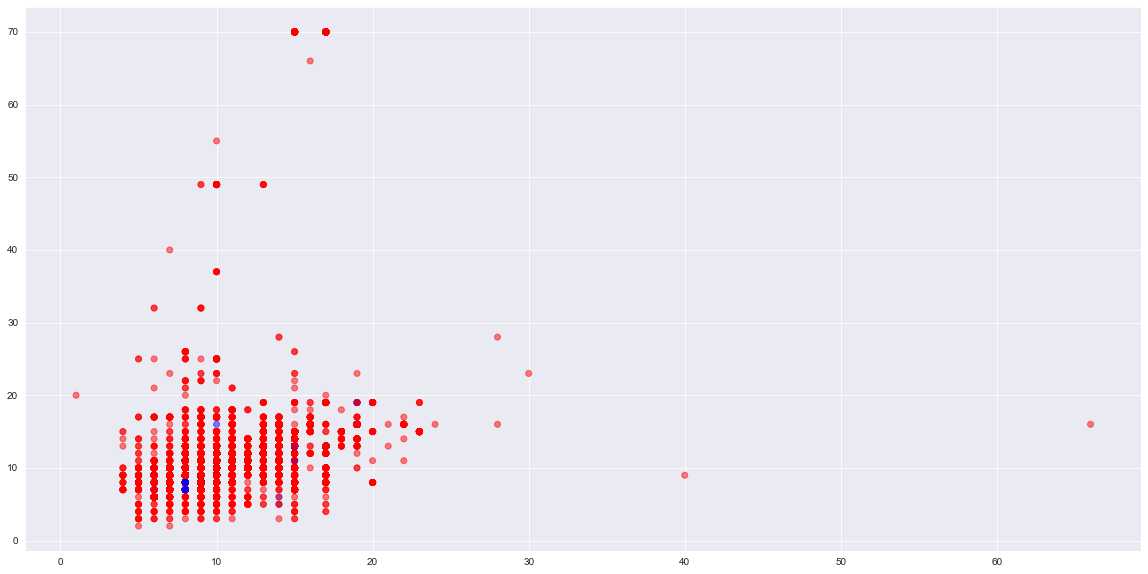

In [17]:
plt.figure(figsize=(20, 10))
c = ['red' if i == 0 else 'blue' for i in full_data['is_abstract']]
plt.scatter(full_data['title_font_size'], full_data['paragraph_font_size'], c=c, alpha=0.5)

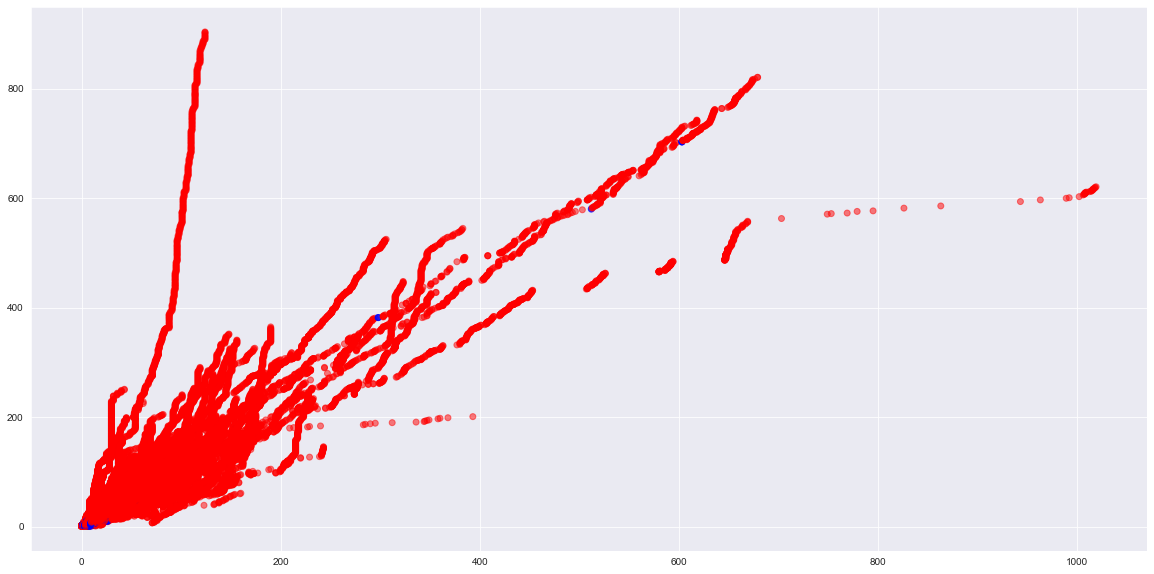

In [18]:
plt.figure(figsize=(20, 10))
c = ['red' if i == 0 else 'blue' for i in full_data['is_abstract']]
plt.scatter(full_data['section'], full_data['paragraph'], c=c, alpha=0.5)

## Fix text float

In [19]:
train_data['text'] = train_data['text'].apply(lambda x: str(x))
test_data['text'] = test_data['text'].apply(lambda x: str(x))
full_data['text'] = full_data['text'].apply(lambda x: str(x))

## char_count and char_count

In [20]:
train_data['char_count'] = train_data['text'].apply(lambda x: len(x))
test_data['char_count'] = test_data['text'].apply(lambda x: len(x))
full_data['char_count'] = full_data['text'].apply(lambda x: len(x))

In [21]:
train_data['word_count'] = train_data['text'].apply(lambda x: len(re.findall(r'(?u)\b\w\w+\b', x)))
test_data['word_count'] = test_data['text'].apply(lambda x: len(re.findall(r'(?u)\b\w\w+\b', x)))
full_data['word_count'] = full_data['text'].apply(lambda x: len(re.findall(r'(?u)\b\w\w+\b', x)))

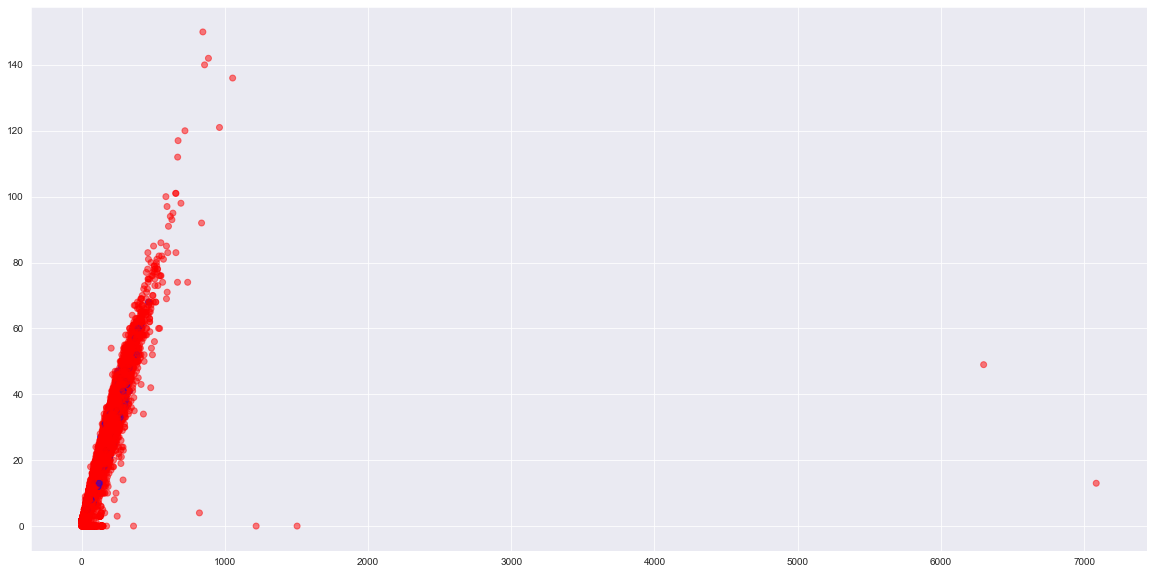

In [22]:
plt.figure(figsize=(20, 10))
c = ['red' if i == 0 else 'blue' for i in full_data['is_abstract']]
plt.scatter(full_data['char_count'], full_data['word_count'], c=c, alpha=0.5)

## dot_count and maj_count

In [23]:
train_data['dot_count'] = train_data['text'].apply(lambda x: len(re.findall(r'\.', x)))
test_data['dot_count'] = test_data['text'].apply(lambda x: len(re.findall(r'\.', x)))
full_data['dot_count'] = full_data['text'].apply(lambda x: len(re.findall(r'\.', x)))

In [24]:
train_data['maj_count'] = train_data['text'].apply(lambda x: len(re.findall(r'[A-Z]', x)))
test_data['maj_count'] = test_data['text'].apply(lambda x: len(re.findall(r'[A-Z]', x)))
full_data['maj_count'] = full_data['text'].apply(lambda x: len(re.findall(r'[A-Z]', x)))

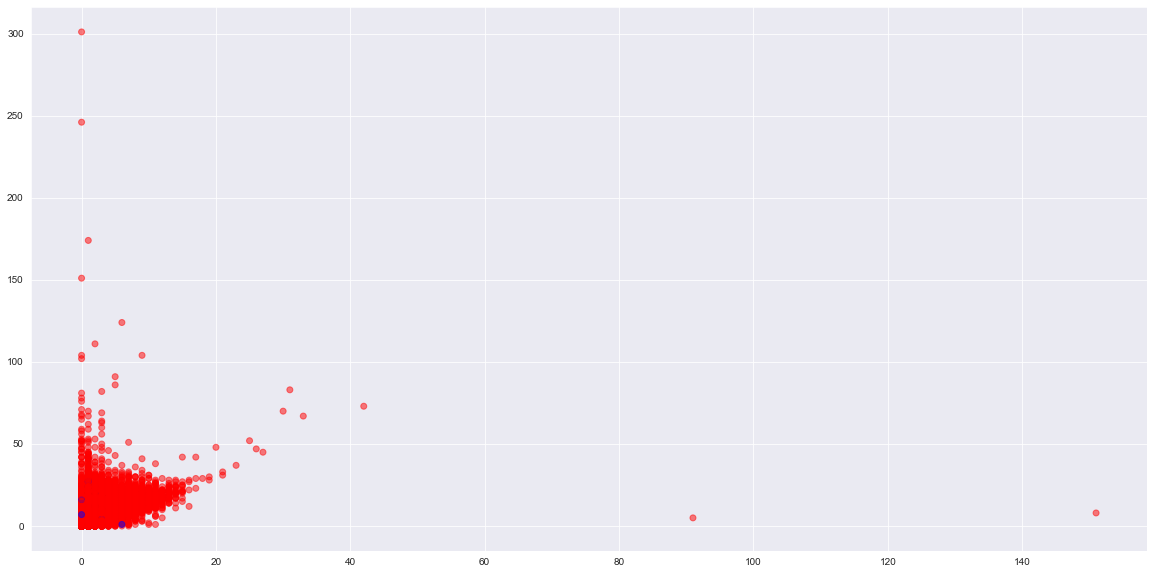

In [25]:
plt.figure(figsize=(20, 10))
c = ['red' if i == 0 else 'blue' for i in full_data['is_abstract']]
plt.scatter(full_data['dot_count'], full_data['maj_count'], c=c, alpha=0.5)

# Model

## Feature Selection

In [26]:
feature_names = ['section', 'paragraph', 'part', 'title_font_size', 'paragraph_font_size', 'dot_count', 'maj_count', 'char_count', 'word_count']
train_data[feature_names].info()
test_data[feature_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21294 entries, 0 to 21293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section              21294 non-null  int64  
 1   paragraph            21294 non-null  int64  
 2   part                 21294 non-null  int64  
 3   title_font_size      21267 non-null  float64
 4   paragraph_font_size  21294 non-null  float64
 5   dot_count            21294 non-null  int64  
 6   maj_count            21294 non-null  int64  
 7   char_count           21294 non-null  int64  
 8   word_count           21294 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section              6838 non-null   int64  
 1   paragraph            6838 non-n

## Fill na

In [27]:
train_data['title_font_size'] = train_data['title_font_size'].fillna(0)
test_data['title_font_size'] = test_data['title_font_size'].fillna(0)
train_data[feature_names].info()
test_data[feature_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21294 entries, 0 to 21293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section              21294 non-null  int64  
 1   paragraph            21294 non-null  int64  
 2   part                 21294 non-null  int64  
 3   title_font_size      21294 non-null  float64
 4   paragraph_font_size  21294 non-null  float64
 5   dot_count            21294 non-null  int64  
 6   maj_count            21294 non-null  int64  
 7   char_count           21294 non-null  int64  
 8   word_count           21294 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section              6838 non-null   int64  
 1   paragraph            6838 non-n

## X, y

In [35]:
scaler = StandardScaler().fit(full_data[feature_names])
X_train, y_train = scaler.transform(train_data[feature_names]), train_data['is_abstract'].astype(int)
X_test, y_test = scaler.transform(test_data[feature_names]), test_data['is_abstract'].astype(int)

NameError: name 'feature_nfeature_namesames' is not defined

## Linear Svc 

In [ ]:
model = LinearSVC(class_weight='balanced', max_iter=1e4).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

##  Random Forest 

In [ ]:
def evaluate(model):
    y_pred = model.predict(X_test)
    print(model.get_params())
    print(model.score(X_test, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    pd.Series(model.feature_importances_, feature_names).sort_values(ascending=False).plot(figsize=(20,5), kind='bar', title='Feature Importances', fontsize=15)
    plt.show()

In [ ]:
params = {'class_weight':'balanced', 'random_state':0}

In [ ]:
model = RandomForestClassifier(**params).fit(X_train, y_train)
evaluate(model)

### Tuning

In [ ]:
params = {'class_weight':'balanced', 'random_state':0}

#### n_estimators

In [ ]:
param_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

In [ ]:
params['n_estimators'] = search.best_params_['n_estimators']

#### max_depth

In [ ]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

In [ ]:
search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

In [ ]:
params['max_depth'] = search.best_params_['max_depth']

#### criterion

In [ ]:
param_grid = {'criterion':['gini', 'entropy']} 

In [ ]:
search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

#### bootstrap

In [ ]:
param_grid = {
    'bootstrap':[True, False],
    'class_weight':['balanced', 'balanced_subsample']          
} 

In [ ]:
search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

#### ...

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]} 

In [ ]:
search = GridSearchCV(RandomForestClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

#### Explore result

In [ ]:
params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 
          'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 
          'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 
          'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 
          'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

In [29]:
model = RandomForestClassifier(**params).fit(X_train, y_train)

NameError: name 'params' is not defined

In [ ]:
y_pred = model.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined

In [31]:
test_data['bad'] = 0
for i in range(len(y_pred)):
    if y_test[i] != y_pred[i]:
        test_data.loc[i, 'bad'] = 1

NameError: name 'y_pred' is not defined

In [32]:
test_data[test_data['bad'] == 1]

Empty DataFrame
Columns: [pdf, section, paragraph, part, title, title_font_size, paragraph_font_size, text, is_abstract, char_count, word_count, dot_count, maj_count, bad]
Index: []

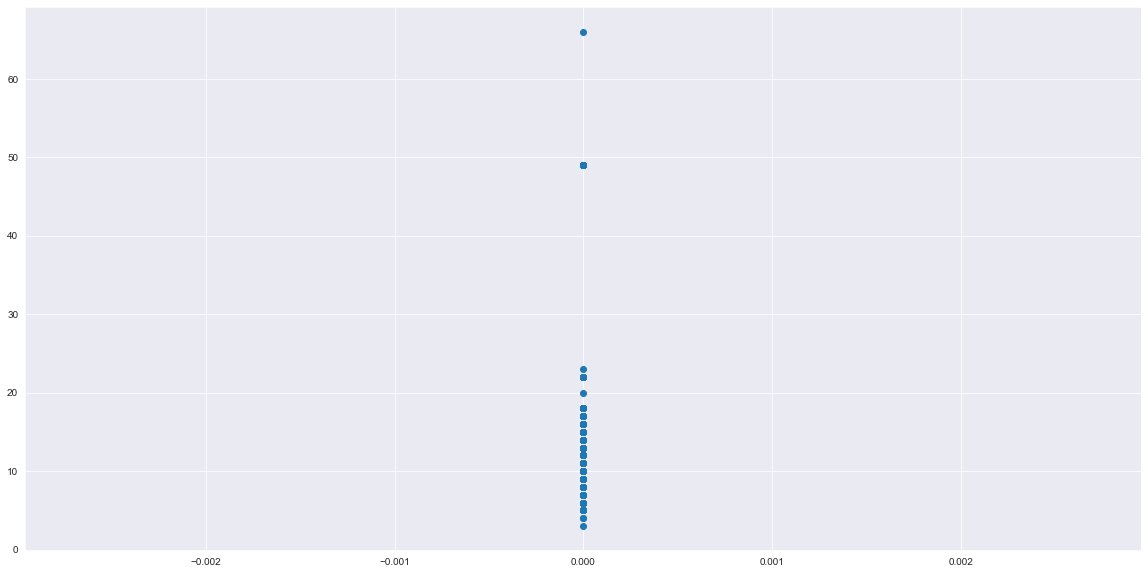

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(test_data['bad'], test_data['paragraph_font_size'])

#### try different treshold

In [34]:
params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 
          'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 
          'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 
          'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 
          'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

In [ ]:
model = RandomForestClassifier(**params).fit(X_train, y_train)

In [ ]:
y_proba = model.predict_proba(X_test)

In [ ]:
tresholds = np.arange(0, 1, step=0.05)
res = np.empty((len(tresholds), 6))
for i in range(0, len(tresholds)):
    report = classification_report(y_test, np.vectorize(lambda x: 1 if x > tresholds[i] else 0)(y_proba[:, 1]), output_dict=True)
    res[i, 0] = report['1']['precision']
    res[i, 1] = report['1']['recall']
    res[i, 2] = report['1']['f1-score']
    res[i, 3] = report['0']['precision']
    res[i, 4] = report['0']['recall']
    res[i, 5] = report['0']['f1-score']      

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 0], label='precision')
ax.plot(tresholds, res[:, 1], label='recall')
ax.plot(tresholds, res[:, 2], label='f1-score')
plt.xticks(tresholds)
leg = ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 3], label='precision')
ax.plot(tresholds, res[:, 4], label='recall')
ax.plot(tresholds, res[:, 5], label='f1-score')
plt.xticks(tresholds)
leg = ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(tresholds, res[:, 2], label='0')
ax.plot(tresholds, res[:, 5], label='1')
plt.xticks(tresholds)
leg = ax.legend()

In [ ]:
y_pred = np.vectorize(lambda x: 1 if x > .4 else 0)(y_proba[:, 1])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## XGB Classifier

In [ ]:
xgb = XGBClassifier().fit(X_train, y_train)
evaluate(xgb)

### Tuning

In [ ]:
params = {'objectif':'binary:logitraw', 'class_weight':'balanced', 'random_state':0}

#### n_estimators

In [ ]:
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'learning_rate':[.005, .001, .01, .05, .1]     
}

In [ ]:
search = GridSearchCV(XGBClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)

In [ ]:
params['n_estimators'] = search.best_params_['n_estimators']
params['learning_rate'] = search.best_params_['learning_rate']

#### max_depth

In [ ]:
param_grid = { 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

In [ ]:
search = GridSearchCV(XGBClassifier(**params), param_grid=param_grid, verbose=1, n_jobs=4).fit(X_train, y_train)
evaluate(search.best_estimator_)